# Introduction to Probability: 

## 1) Probability densities, 2) some sample distributions


### Probability densities:
We can easily visualize our densities by a "normalized histogram" that gives the values with their appropriate probability weightings:

    Examples:
        Fair Coin: 1/2, 1/2
        Unfair Coin: 1/3, 2/3
        Fair Die: 1/6, 1/6, 1/6, 1/6, 1/6, 1/6
        Unfair Die: 1/20, 2/20, 2/20, 2/20, 2/20, 11/20

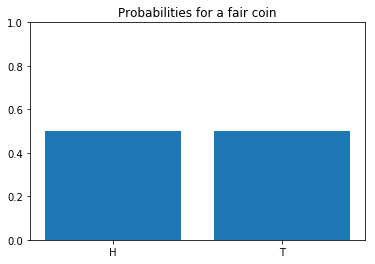

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

## PROBABILITIES FOR A FAIR COIN
Left = [0,1]
Vals = ['H', 'T']
Probs = [1.0/2, 1.0/2]

## Plot the probabilities
fig = plt.figure()
H = plt.bar(Left, Probs, align='center')
H = plt.xticks(Left, Vals)
H = plt.ylim((0,1))
H = plt.title("Probabilities for a fair coin")

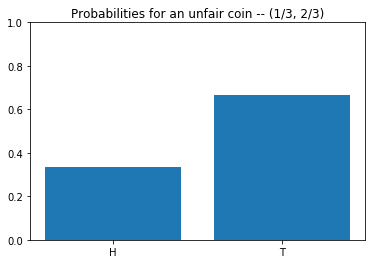

In [5]:
## PROBABILITIES FOR OF AN UNFAIR COIN
Left = [0,1]
Vals = ['H', 'T']
Probs = [1.0/3, 2.0/3]

## Plot the histogram
fig = plt.figure()
H = plt.bar(Left, Probs, align='center')
H = plt.xticks(Left, Vals)
H = plt.ylim((0,1))
H = plt.title("Probabilities for an unfair coin -- (1/3, 2/3)")

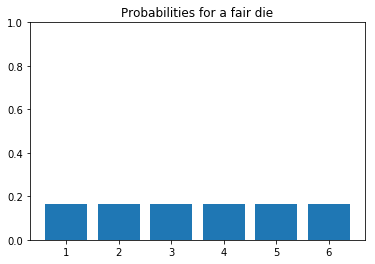

In [6]:
## PROBABILITIES FOR A FAIR DIE
n = 6
Left = range(n)
Vals = range(1,n+1)
Probs = n * [1.0/n]

## Plot the histogram
fig = plt.figure()
H = plt.bar(Left, Probs, align='center')
H = plt.xticks(Left, Vals)
H = plt.ylim((0,1))
H = plt.title("Probabilities for a fair die")

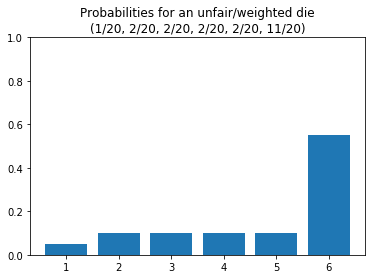

In [8]:
## PROBABILITIES FOR AN UNFAIR FAIR DIE
n = 6
Left = range(n)
Vals = range(1,n+1)
Probs = [1.0/20] + 4*[2.0/20] + [11.0/20]

## Plot the histogram
fig = plt.figure()
H = plt.bar(Left, Probs, align='center')
H = plt.xticks(Left, Vals)
H = plt.ylim((0,1))
H = plt.title("Probabilities for an unfair/weighted die\n(1/20, 2/20, 2/20, 2/20, 2/20, 11/20)")

**Note:** Usually we talk about possibilities as having **numeric** values so we can compute useful numerical quantities to describe random variables.

### Compute the probabilities for a sum of n coins

In [9]:
## Python Code to create and view probability distributions!

%matplotlib inline
import matplotlib.pyplot as plt


def make_die(d=6):
    # dict comprehensions: 
    # RV = {val: 1./6 for val in range(1, d+1)}
    RV = {}
    for val in range(1, d+1):
        RV[val] = 1.0/6    
    return RV

def make_sum_of_two_variables(V1, V2):
    """
    RV = ([val_list], [prob_list])    
    """
    new_V = {}
    for v1 in V1:
        for v2 in V2:            
            new_V[v1 + v2] = new_V.get(v1 + v2, 0) + V1[v1] * V2[v2]

    ## Adjust for roundoff error -- Rescale the probabilities to sum to one
    inv_prob_sum = 1.0 / sum(new_V.values())
    for k in new_V:
        new_V[k] *= inv_prob_sum 
        
    return new_V
            

def RV_mean(V):
    """
    Return the mean of the random variable.    
    """
    # return sum(val*prob for val, prob in V.iteritems())
    mean = 0.0
    for val, prob in V.iteritems():
        mean += prob * val
    return mean

    
def RV_histogram(V, n):
    
    Vals = V.keys()
    Probs = [V[val] for val in Vals]
    d = len(Vals)
    Left = Vals
    
    ## Plot the histogram
    fig = plt.figure()
    H = plt.bar(Left, Probs, align='center', width = 1.0)
  #  H = plt.xticks(Left, Vals)
    H = plt.ylim((0,1))
    if n == 1:
        H = plt.title("Probabilities for one fair die")
    else:
        H = plt.title("Probabilities for the sum of " + str(n) + " fair dice")
        
    
def RV_histogram__dots(V, n):
    
    Vals = V.keys()
    Probs = [V[val] for val in Vals]
    d = len(Vals)
    Left = Vals
    
    ## Plot the histogram
    fig = plt.figure()
    H = plt.plot(Left, Probs, 'bo')
 #   H = plt.xticks(Left, Vals)
    H = plt.ylim((0,1))
    x_min, x_max = plt.xlim()  
    eps = 0.5
    H = plt.xlim([x_min - eps, x_max + eps])
    if n == 1:
        H = plt.title("Probabilities for one fair die")
    else:
        H = plt.title("Probabilities for the sum of " + str(n) + " fair dice")
        
    
def RV_mean_scaled_histogram(V, n, use_unscaled_xticks=True):
    
 #   mean = RV_mean(V)

    Vals = V.keys()
    Scaled_Vals = [1.0 * v / n   for v in V.keys()]
    Probs = [n*V[val] for val in Vals]
    max_prob = max(Probs + [1])
    d = len(Vals)
    Left = Vals
    Scaled_Left = Scaled_Vals
    
    ## Plot the histogram
    fig = plt.figure()
    H = plt.bar(Scaled_Left, Probs, align='center', width=1.0/n)
    if not use_unscaled_xticks:
        H = plt.xticks(Scaled_Left, Scaled_Vals)
    H = plt.ylim((0,max_prob))
    if n == 1:
        H = plt.title("Scaled Probabilities for one fair die")
    else:
        H = plt.title("Scaled Probabilities for the sum of " + str(n) + " fair dice")

In [10]:
D_list = [make_die()]
for i in range(9):
    D_list.append(make_sum_of_two_variables(D_list[-1], D_list[-1]))

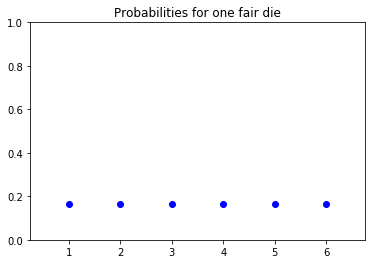

In [11]:
k = 0
RV_histogram__dots(D_list[k],n = 2**k)


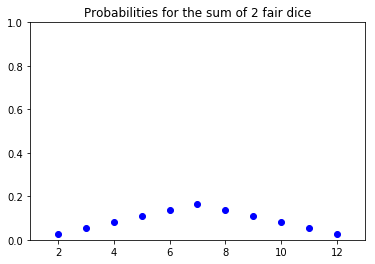

In [12]:
k = 1
RV_histogram__dots(D_list[k],n = 2**k)

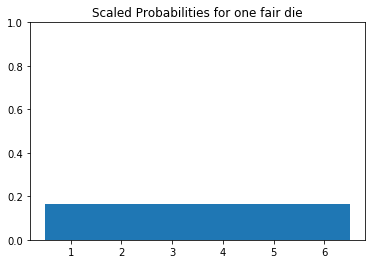

In [13]:
k = 0
RV_mean_scaled_histogram(D_list[k],n = 2**k)

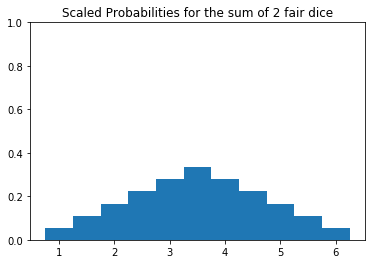

In [14]:
k = 1
RV_mean_scaled_histogram(D_list[k],n = 2**k)

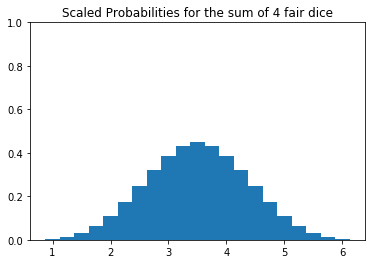

In [15]:
k = 2
RV_mean_scaled_histogram(D_list[k],n = 2**k)

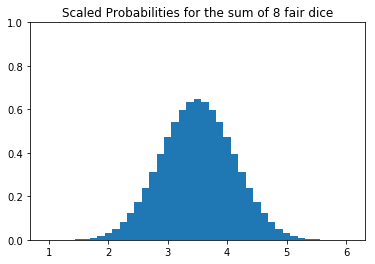

In [16]:
k = 3
RV_mean_scaled_histogram(D_list[k],n = 2**k)

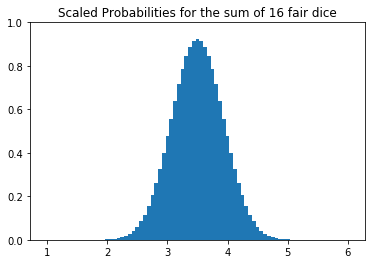

In [17]:
k = 4
RV_mean_scaled_histogram(D_list[k],n = 2**k)

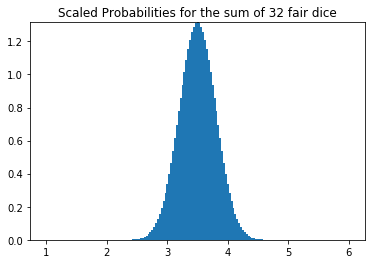

In [18]:
k = 5
RV_mean_scaled_histogram(D_list[k],n = 2**k)

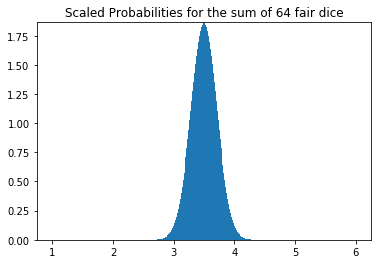

In [19]:
k = 6
RV_mean_scaled_histogram(D_list[k],n = 2**k)

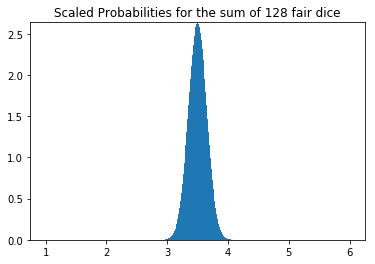

In [20]:
k = 7
RV_mean_scaled_histogram(D_list[k],n = 2**k)

## Examples of distributions

### Uniform random variables

A **uniform random variable** on the interval $[a,b]$ is any random variable $X$ with a probability density function satisfying
$$ $$
$$
\rho_X(x) = \begin{cases}
\frac{1}{b-a} &\qquad \text{if $a \leq x \leq b$,} \\
0 & \qquad \text{otherwise.}
\end{cases}
$$

<img width=400 
src="https://upload.wikimedia.org/wikipedia/commons/9/96/Uniform_Distribution_PDF_SVG.svg">

This is the most common distribution that vanishes outside of a closed interval.

### Gaussian / Normal Distribution

A **normal random variable** $\mathcal{N}(\mu, \sigma^2)$ with mean $\mu$ and variance $\sigma^2>0$ is any random variable $X$ with a probability density function satisfying
$$ $$
$$
\rho_X(x) = \frac{1}{\sqrt{2\pi}\sigma} e^\frac{-(x-\mu)^2}{2\sigma^2} = \frac{1}{\sqrt{2\pi}\sigma}\exp\left({\frac{-(x-\mu)^2}{2\sigma^2}}\right).
$$

<img width=400  src="https://upload.wikimedia.org/wikipedia/commons/7/74/Normal_Distribution_PDF.svg">

This is important for the Central Limit Theorem.

### Log-Gaussian
A **log-normal random variable** with "mean" $\mu$ and "variance" $\sigma^2 > 0$ is any random variable $X$ with a probability density function satisfying
$$ $$
$$
\rho_X(x) 
= \begin{cases}
\frac{1}{\sqrt{2\pi}x \sigma} 
e^\frac{-(\ln(x)-\mu)^2}{2\sigma^2} & \qquad \text{if $x > 0$,}
\\
0 & \qquad \text{otherwise.}
\end{cases}
$$

<img width="400" height="400"
src="https://upload.wikimedia.org/wikipedia/commons/a/ae/PDF-log_normal_distributions.svg">



### Exponential distribution
An **exponential random variable** with parameter $\lambda > 0$ is any random variable $X$ with a probability density function satisfying
$$ $$
$$
\rho_X(x) = 
\begin{cases}
λ e^{−λx} = \lambda \exp(-\lambda x) &\qquad \text{if $x \geq 0$,} \\
0 & \qquad \text{otherwise.}
\end{cases}
$$

<img width="400" height="400"
src="https://upload.wikimedia.org/wikipedia/commons/e/ec/Exponential_pdf.svg">

Here $\lambda$ is called the **rate parameter**, and this is often used to describe the time between occurences of events.

### Poisson distribution -- a useful discrete random variable
A **Poisson random variable** with parameter $\lambda > 0$ is any random variable $X$ with a probability density function satisfying
$$ $$
$$
\rho_X(k) = \begin{cases}
\frac{\lambda^k}{e^\lambda \cdot k!} &\qquad \text{if $k$ is a non-negative integer,} \\
0 & \qquad \text{otherwise.}
\end{cases}
$$

<img width="400" height="400"
src="https://upload.wikimedia.org/wikipedia/commons/1/16/Poisson_pmf.svg">


This is often used to describe the number of events that occur in a given amount of time.

## Independent random variables

Two random varaiables $X$ and $Y$ are called **independent** if for any two intervals $I_1$ and $I_2$ we have that 
$$ $$
$$
P(X \in I_1 \text{ and } Y \in I_2) 
= \int_{x \in I_1} \int_{y \in I_2} \rho_X(x) \rho_Y(y)\, dx\, dy.
$$

In other words the random variables $X$ and $Y$ are independent if their **joint probability density** $\rho_{X,Y}(x,y)$ has the form
$$ $$
$$\rho_{X,Y}(x,y) =\rho_X(x) \rho_Y(y).$$

Otherwise we say that $X$ and $Y$ are **dependent**

## Useful quantities

- **Expected Value / Mean**
$$ $$
$$ E(X) := \int_{x \in \mathbb{R}} x \cdot \rho_X(x) \, dx $$
    
- **Variance**
$$ $$
\begin{align} 
Var(X) := (\sigma_x)^2 &:= E\left((X - E(X))^2\right) 
\\
&= \int_{x \in \mathbb{R}} (x - E(X))^2 \cdot \rho_X(x) \, dx \geq 0
\end{align}

- **Standard Deviation**
$$ $$
$$\sigma_x := \sqrt{Var(X)} \geq 0$$


The transition from discrete to continuous random variables is essentially to replace
$$ $$
$$\sum_\text{values $x$ of $X$} P(X=x) \times (\text{Blah})$$ 
with 
$$ $$
$$\int_{x\in \mathbb{R}} (\text{Blah}) \cdot \rho_X(x)\, dx$$
in all of the formulas!

For two random variables $X$ and $Y$, their **covariance** is given by the formula
$$ $$
$$
\int_{x \in \mathbb{R}} \int_{y \in \mathbb{R}}
(x - E(X))(y - E(Y)) \cdot \rho_{X\times Y}(x,y) \, dy \, dx
$$
$$ $$
which can also be written more simply as 
$$ $$
$$
E\left((X - E(X))(Y - E(Y))\right).
$$


# Play with some functions

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
%matplotlib inline

/Users/larakattan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/larakattan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


** Function Definitions **

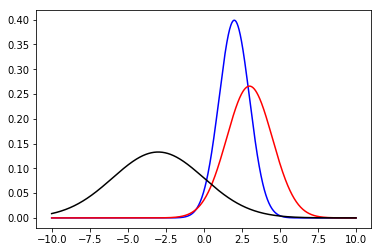

In [22]:
def normal(x,mu,sig):
    return 1/(np.sqrt(2*3.14159)*sig)*np.exp(-(x-mu)**2/(2*sig**2))
x = np.linspace(-10,10,num=1000)
y = normal(x,2,1.0)
y2 = normal(x,3,1.5)
y3 = normal(x,-3,3)
plt.plot(x,y,'b',x,y2,'r',x,y3,'k');

/Users/larakattan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/larakattan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/larakattan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


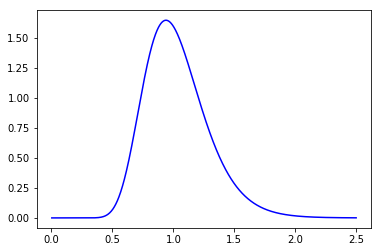

In [23]:
def log_normal(x,mu,sig):
    return 1/(np.sqrt(2*3.14159)*sig*x)*np.exp(-(np.log(x)-mu)**2/(2*sig**2))
x = np.linspace(0,2.5,num=1000)
y = log_normal(x,0,0.25)
plt.plot(x,y,'b');

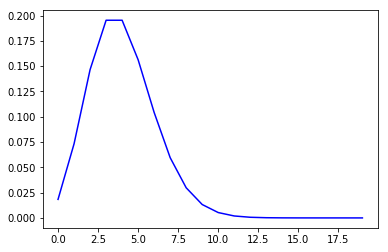

In [24]:
def poisson(klist,lam):
    result=[]
    for k in klist:
        result.append(lam**k/math.factorial(k)*np.exp(-lam))
    return result
k = range(0,20)
y = poisson(k,4)
plt.plot(k,y,'b');

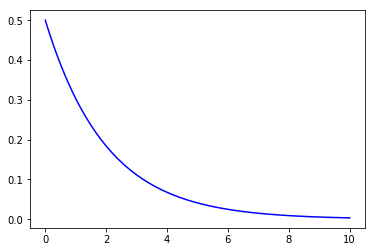

In [25]:
def exp_dist(x, lam):
    return lam*np.exp(-lam*x)

x = np.linspace(0,10,num=1000)
y = exp_dist(x,0.5)
plt.plot(x,y,'b');